<a href="https://colab.research.google.com/github/davibragam/Introducao_pandas/blob/main/Pandas_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando a biblioteca pandas
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [ ]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
230,Salvador,2019-01-03,184.69,1036,1
231,Salvador,2019-01-03,89.85,1034,2
232,Salvador,2019-01-03,167.76,1034,3
233,Salvador,2019-01-03,172.40,1036,2
234,Salvador,2019-01-03,48.39,1035,2
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
50,Natal,2019-03-08,324.00,854,4
68,Salvador,2019-01-01,162.35,1037,3
66,Salvador,2019-01-01,70.20,1035,3
17,Fortaleza,2019-01-01,166.80,1004,1
189,Salvador,2019-01-02,139.73,1037,2


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
#Removendo as linhas com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

Criando colunas de dados

In [ ]:
#Criando a coluna de receitas
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df['Receitas/Vendas'] = df['Receita'] / df['Vendas']

In [ ]:
#Convertendo coluna Receitas/Vendas para inteiro
df['Receitas/Vendas'] = df['Receitas/Vendas'].astype('int')

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8


In [ ]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [ ]:
#nlargest
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4
51,Natal,2018-01-21,859.0,852,4,3436.0,4
55,Natal,2019-01-08,859.0,854,4,3436.0,4


In [ ]:
#nsmallest
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1
65,Recife,2019-01-01,4.01,981,1,4.01,1
92,Natal,2019-01-02,4.57,1035,1,4.57,1


In [ ]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4
55,Natal,2019-01-08,859.0,854,4,3436.0,4
51,Natal,2018-01-21,859.0,852,4,3436.0,4
30,Natal,2018-10-02,856.0,853,4,3424.0,4
41,Natal,2018-05-20,835.0,852,4,3340.0,4
38,Natal,2018-02-25,828.0,852,4,3312.0,4
10,Natal,2018-10-27,828.0,852,4,3312.0,4
69,Natal,2019-03-24,817.0,852,4,3268.0,4
62,Natal,2018-02-10,793.0,854,4,3172.0,4
52,Natal,2018-04-27,778.0,854,4,3112.0,4


# ***Trabalhando com Datas***

In [ ]:
#Transformando a coluna de data em tipo inteiro
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas             int64
dtype: object

In [ ]:
#Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas             int64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
df['Ano_venda'] = (df['Data'].dt.year)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda
1,Recife,2019-01-01,11.44,983,1,11.44,1,2019
48,Fortaleza,2019-01-01,40.71,1002,6,244.26,6,2019
202,Natal,2019-01-02,22.45,1036,1,22.45,1,2019
173,Salvador,2019-01-02,31.77,1034,2,63.54,2,2019
123,Salvador,2019-03-02,127.45,1036,3,382.35,3,2019


In [ ]:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda
102,Natal,2019-01-02,40.84,1034,3,122.52,3,2019,1,2
186,Salvador,2019-01-02,169.09,1036,2,338.18,2,2019,1,2
13,Recife,2019-02-12,15.33,983,5,76.65,5,2019,2,12
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2,2018,1,1
91,Salvador,2019-01-01,17.74,1035,1,17.74,1,2019,1,1


In [ ]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculandoa a diferença de dias
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,Diferenca_dias
104,Recife,2019-01-01,40.11,983,5,200.55,5,2019,1,1,365 days
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3,2019,3,2,425 days
99,Salvador,2019-01-01,40.38,1037,1,40.38,1,2019,1,1,365 days
151,Salvador,2019-01-02,14.63,1035,1,14.63,1,2019,1,2,366 days
93,Salvador,2019-01-01,15.58,1037,1,15.58,1,2019,1,1,365 days


In [ ]:
#Reorganizando as colunas
df = df[['Cidade','Data','Vendas','LojaID','Qtde','Receita','Receitas/Vendas','Ano_venda','mes_venda','dia_venda','Diferenca_dias']]

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,Diferenca_dias
0,Natal,2018-08-27,606.00,853,2,1212.00,2,2018,8,27,238 days
98,Recife,2019-01-01,137.34,981,8,1098.72,8,2019,1,1,365 days
38,Natal,2018-02-25,828.00,852,4,3312.00,4,2018,2,25,55 days
164,Natal,2019-01-02,6.59,1035,1,6.59,1,2019,1,2,366 days
220,Natal,2019-01-02,42.71,1035,1,42.71,1,2019,1,2,366 days


In [ ]:
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,Diferenca_dias
179,Salvador,2019-01-02,64.95,1036,1,64.95,1,2019,1,2,366 days
132,Natal,2019-01-02,19.61,1036,2,39.22,2,2019,1,2,366 days
227,Salvador,2019-01-02,14.70,1035,1,14.70,1,2019,1,2,366 days
114,Recife,2019-03-02,16.82,983,4,67.28,4,2019,3,2,425 days
87,Aracaju,2018-01-01,116.71,1520,4,466.84,4,2018,1,1,0 days


In [ ]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Criando a coluna de trimestre
df['Trimestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
138,Recife,2019-03-02,150.38,983,6,902.28,6,2019,3,2,425 days,1
185,Natal,2019-01-02,6.67,1036,1,6.67,1,2019,1,2,366 days,1
13,Salvador,2019-02-12,39.29,1035,1,39.29,1,2019,2,12,407 days,1
73,Natal,2018-01-05,773.00,852,2,1546.00,2,2018,1,5,4 days,1
64,Natal,2019-02-22,704.00,853,4,2816.00,4,2019,2,22,417 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
115,Salvador,2019-03-02,202.33,1035,2,404.66,2,2019,3,2,425 days,1
128,Recife,2019-03-02,38.70,982,4,154.80,4,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,3,2019,3,2,425 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,4,2019,3,2,425 days,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,1,2019,3,2,425 days,1
129,Recife,2019-03-02,35.34,982,7,247.38,7,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3,2019,3,2,425 days,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,5,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,5,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,4,2019,3,2,425 days,1


# ***Visualização de dados***

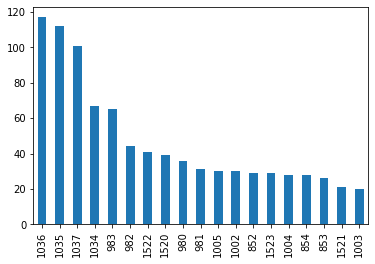

In [ ]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()